## Import required libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Web scraping

In [12]:
URL = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_India'

In [13]:
try:
    response = requests.get(URL)
    soup = BeautifulSoup(response.text,'html')
    table = soup.find_all('table')[1]
    head = table.find_all('th')
    col_name = [co_head.text.strip() for co_head in head]
    top_50 = pd.DataFrame(columns = col_name)
    column_data = table.find_all('tr')

    for row in column_data[1:]:
        row_data = row.find_all('td')
        individual_row_data = [data.text.strip() for data in row_data]

        length = len(top_50)
        top_50.loc[length] = individual_row_data
        

    top_50 = top_50.to_csv(r"E:\BA projects\web_scrape.csv",index = False)
except Exception as e:
    print(e)

## Cleaned the unrecognisable value in Excel

### Load the Dataset

In [2]:
df = pd.read_csv(r"E:\BA projects\web_scrape.csv")

### Inspect the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               50 non-null     int64 
 1   Name               50 non-null     object
 2   Industry           50 non-null     object
 3   Revenue(in Crore)  50 non-null     object
 4   Revenue growth     50 non-null     object
 5   Profits(in Crore)  50 non-null     object
 6   Headquarters       50 non-null     object
 7   State Controlled   20 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.3+ KB


### Column Transformation: Renaming and Datatype conversion

In [4]:
df.rename(columns = {'Revenue(in Crore)':'Revenue_in_crore','Profits(in Crore)':'Profits_in_crore'},inplace = True)

In [5]:
df.head()

,Rank,Name,Industry,Revenue_in_crore,Revenue growth,Profits_in_crore,Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,"4,24,321",13.20%,"22,189",New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,"4,10,295",28.20%,"36,075",Mumbai,NaN
2,3,Oil and Natural Gas Corporation,Oil and gas,"3,33,143",11.00%,"22,106",New Delhi,Yes
3,4,State Bank of India,Banking,"3,06,528",2.60%,"4,556",Mumbai,Yes
4,5,Tata Motors,Automotive,"3,01,175",7.90%,"8,989",Mumbai,NaN


In [6]:
df['Revenue growth'] = df['Revenue growth'].str.strip('%').astype(float)
df['Revenue_in_crore'] = df['Revenue_in_crore'].str.replace(',','').astype(int)
df['Profits_in_crore'] = df['Profits_in_crore'].str.replace(',','').astype(float)
df['Profits_in_crore'] = df['Profits_in_crore'].astype(int)

In [7]:
df.head()

,Rank,Name,Industry,Revenue_in_crore,Revenue growth,Profits_in_crore,Headquarters,State Controlled
0,1,Indian Oil Corporation,Oil and gas,424321,13.2,22189,New Delhi,Yes
1,2,Reliance Industries Limited,Oil and gas,410295,28.2,36075,Mumbai,NaN
2,3,Oil and Natural Gas Corporation,Oil and gas,333143,11.0,22106,New Delhi,Yes
3,4,State Bank of India,Banking,306528,2.6,4556,Mumbai,Yes
4,5,Tata Motors,Automotive,301175,7.9,8989,Mumbai,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              50 non-null     int64  
 1   Name              50 non-null     object 
 2   Industry          50 non-null     object 
 3   Revenue_in_crore  50 non-null     int32  
 4   Revenue growth    50 non-null     float64
 5   Profits_in_crore  50 non-null     int32  
 6   Headquarters      50 non-null     object 
 7   State Controlled  20 non-null     object 
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 2.9+ KB


### Clean the Dataset

In [9]:
df.isnull().sum()

Rank                 0
Name                 0
Industry             0
Revenue_in_crore     0
Revenue growth       0
Profits_in_crore     0
Headquarters         0
State Controlled    30
dtype: int64

In [10]:
df.fillna('No',inplace = True)

In [11]:
df['State Controlled'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: State Controlled
Non-Null Count  Dtype 
--------------  ----- 
50 non-null     object
dtypes: object(1)
memory usage: 532.0+ bytes


### Interpretation

I didn't remove any outlier in the dataset to ensure originality

In [38]:
def barh(x,y,colors,title = '',xlabel = '',ylabel = ''):
    plt.barh(x,y,color = colors)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()


def bar(x,y,colors,title = '',xlabel = '',ylabel = ''):
    plt.bar(x,y,color = colors)
    plt.gca().invert_xaxis()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


def hist(x,y,colors,title = '',xlabel = '',ylabel = ''):
    plt.hist(x,y,color = colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


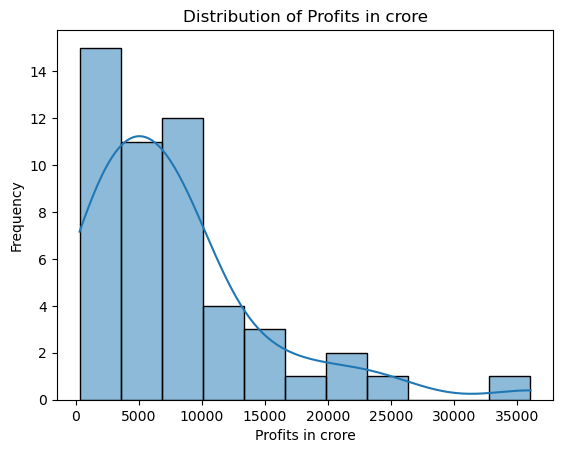

In [50]:
sns.histplot(df['Profits_in_crore'],kde = True)

plt.title('Distribution of Profits in crore')
plt.xlabel('Profits in crore')
plt.ylabel('Frequency')
plt.show()

Observation : Less than 2 companies generate more than 30000 crore as profit

In [35]:
colors = ['orange' if x>=0 else 'red' for x in df['Profits_in_crore']]

In [36]:
profit_ind = df.groupby('Industry')['Profits_in_crore'].mean().sort_values(ascending = False)

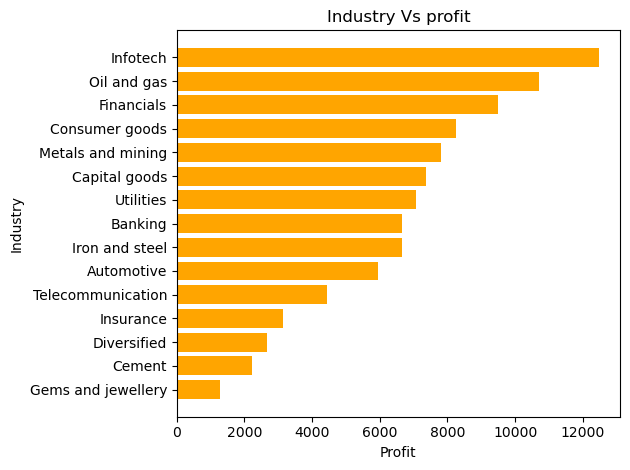

In [39]:
barh(profit_ind.index,profit_ind.values,colors,'Industry Vs profit','Profit','Industry')

 Observation :
    Infotech Industry generate more profit than any other Industry

In [16]:
profit_com = df.groupby('Name')['Profits_in_crore'].sum().sort_values(ascending = False)[0:10]

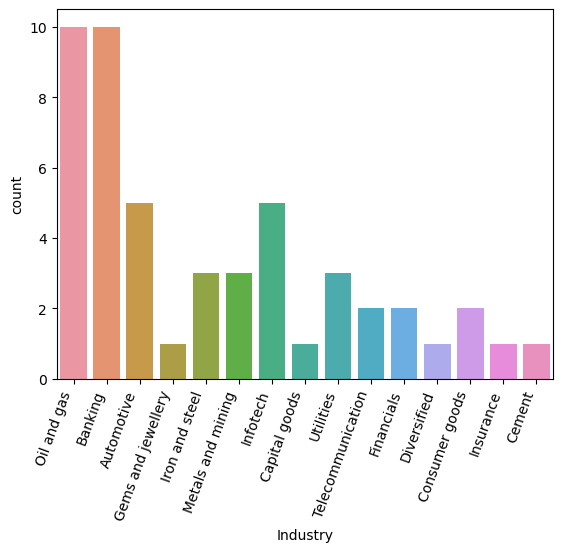

In [63]:
sns.countplot(x = 'Industry', data = df)
plt.xticks(rotation = 70, ha = 'right')
plt.show()

Observation: Reliance Industries Limited generate more profit than any other companies but this company comes under the oil and gas industry that where second most profit generating industry. When compared to Infotech and Oil and gas Industries there are twice the count is more for Oil and gas Industries. It conclude that Infotech companies are more profit than any other companies.